In [2]:
#data tools
from src import prepare_europe_data, prepare_empty_frame, plot_covid_data, get_daily_cases, tukey_outliers, crosscorr
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
import itertools

#linear algebra/ math
import numpy as np 
from math import sqrt

#plots
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pandas.plotting import lag_plot
plt.style.use('seaborn')

#metrics
from sklearn.metrics import mean_squared_error

#statistical tools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import ccf
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy import stats

#models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import curve_fit
from statsmodels.tsa.arima_model import ARIMA

In [3]:
data_path = '../../data/raw/time_series_covid19_confirmed_global.csv'
data_raw = pd.read_csv(data_path)
data_prepared_poland = prepare_europe_data(data=data_raw, start_date='4/1/20', end_date='5/20/20', country='Poland')
df = data_prepared_poland

In [4]:
plot_covid_data(data=data_prepared_poland, country='Poland')

In [5]:
df, daily_growth_series = get_daily_cases(df)

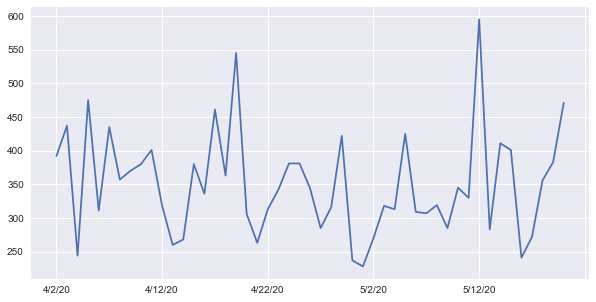

In [6]:
plt.figure(figsize=(10,5))
daily_growth_series.plot()

In [7]:
from fbprophet import Prophet

In [8]:
df_daily = pd.DataFrame(daily_growth_series)
df_daily['ds'] = df_daily.index
df_daily = df_daily.rename(columns = {'DailyGrowthCases':'y'})
df_daily = df_daily.reset_index()
del df_daily['index']
df_daily = df_daily[['ds', 'y']]
df_daily.ds = pd.to_datetime(df_daily.ds)

In [9]:
m = Prophet()
m.fit(df_daily)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
df_daily.tail()

,ds,y
44,2020-05-16,241
45,2020-05-17,272
46,2020-05-18,356
47,2020-05-19,383
48,2020-05-20,471


In [11]:
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
51,2020-05-23
52,2020-05-24
53,2020-05-25
54,2020-05-26
55,2020-05-27


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
51,2020-05-23,298.639725,207.911619,386.852695
52,2020-05-24,360.346782,262.201947,459.851260
53,2020-05-25,295.212716,210.364313,393.515309
54,2020-05-26,370.060946,278.624310,459.852767
55,2020-05-27,348.635406,261.227700,441.608071


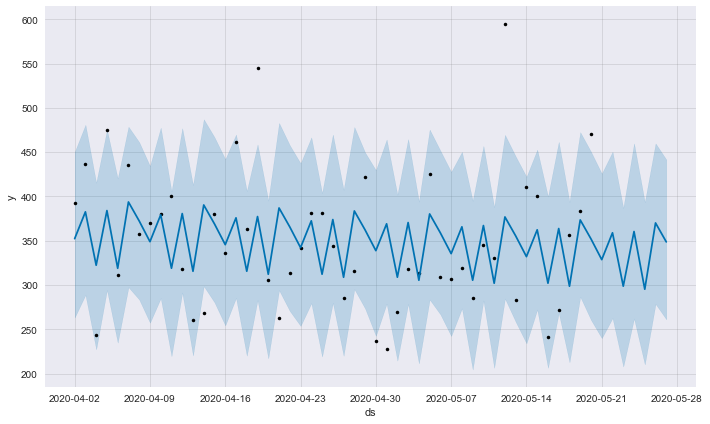

In [13]:
fig1 = m.plot(forecast)

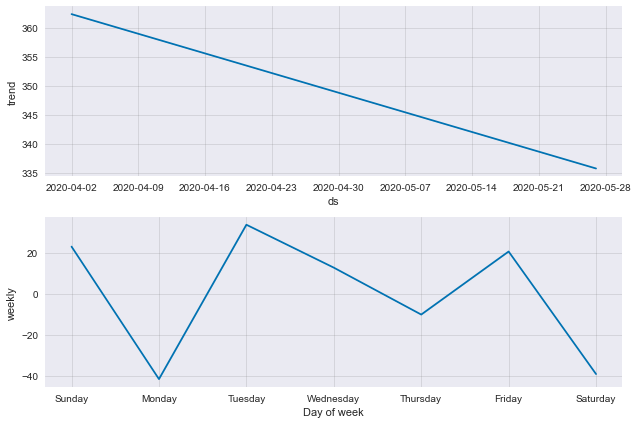

In [14]:
fig2 = m.plot_components(forecast)

In [1]:
next_week = forecast[-7:]['yhat'].sum()
next_week

NameError: name 'forecast' is not defined

In [16]:
poland_gt = prepare_europe_data(data=data_raw, start_date='5/20/20', end_date='5/27/20', country='Poland')

In [17]:
gt_total = poland_gt['5/27/20'].values[0]
gt_total

22473

In [18]:
predicted_total = poland_gt['5/20/20'].values[0] + next_week
predicted_total

22099.448459175

In [19]:
gt_total - predicted_total

373.5515408249994

Predicted for 5/27/20 - 22099

Official for 5/20/20 - 22473

Error - (373) ConfirmedCases